In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import math
import json
import fileinput
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

pd.set_option('display.max_columns', None)

In [94]:
dir = '../raw_eval_data/rna/'
files = os.listdir(dir)
files = [dir+i for i in files if '.json' in i]
files

['../raw_eval_data/rna/SRR6048806_adaptertrim_Log.final.out.json',
 '../raw_eval_data/rna/SRR11861905_ntrimmer_Log.final.out.json',
 '../raw_eval_data/rna/SRR11861905_seqscreener_rrna_Log.final.out.json',
 '../raw_eval_data/rna/SRR6048806_ntrimmer_Log.final.out.json',
 '../raw_eval_data/rna/SRR6048806_skewerqtrim_Log.final.out.json',
 '../raw_eval_data/rna/SRR6048806_deduper_Log.final.out.json',
 '../raw_eval_data/rna/SRR6048806_adapterremoval_adaptertrim_Log.final.out.json',
 '../raw_eval_data/rna/SRR11861905_seqscreener_phix_Log.final.out.json',
 '../raw_eval_data/rna/SRR11861905_none_Log.final.out.json',
 '../raw_eval_data/rna/SRR11861905_qtrimmer_Log.final.out.json',
 '../raw_eval_data/rna/SRR6048806_none_Log.final.out.json',
 '../raw_eval_data/rna/SRR6048806_seqscreener_rrna_Log.final.out.json',
 '../raw_eval_data/rna/SRR11861905_lengthfilter_Log.final.out.json',
 '../raw_eval_data/rna/SRR11861905_adaptertrim_Log.final.out.json',
 '../raw_eval_data/rna/SRR11861905_skewerqtrim_Log.

In [101]:
file = files[0]
with open(file,'r',encoding='utf-8-sig') as f:
        d = json.load(f)
        cols = [i for i in d.keys()]
        print(cols)
        df = pd.DataFrame(columns = cols + ['filename'])


for file in files:
    #clean_file(file)
    with open(file) as f:
        d = json.load(f)
        for i in d.keys():
            if '%' in i:
                d[i] = float(d[i].replace('%',''))
        for i in d.keys():
            if 'Number' in i or 'number' in i:
                d[i] = int(d[i])
        cols = [i for i in d.keys()]
        d['filename'] = file
        job_type_int = d['filename'].split('/')[-1].split('_')[1:]
        
        d['job_type'] = "".join(job_type_int).replace('Log.final.out.json','')
        d['dataset'] = d['filename'].split('/')[-1].split('_')[0]

        df = df.append(d, ignore_index=True)
        
df

        

['Started job on ', 'Started mapping on ', 'Finished on ', 'Mapping speed, Million of reads per hour ', 'Number of input reads ', 'Average input read length ', 'Uniquely mapped reads number ', 'Uniquely mapped reads % ', 'Average mapped length ', 'Number of splices: Total ', 'Number of splices: Annotated (sjdb) ', 'Number of splices: GT/AG ', 'Number of splices: GC/AG ', 'Number of splices: AT/AC ', 'Number of splices: Non-canonical ', 'Mismatch rate per base, % ', 'Deletion rate per base ', 'Deletion average length ', 'Insertion rate per base ', 'Insertion average length ', 'Number of reads mapped to multiple loci ', '% of reads mapped to multiple loci ', 'Number of reads mapped to too many loci ', '% of reads mapped to too many loci ', '% of reads unmapped: too many mismatches ', '% of reads unmapped: too short ', '% of reads unmapped: other ', 'Number of chimeric reads ', '% of chimeric reads ']


,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,Number of splices: Non-canonical,"Mismatch rate per base, %",Deletion rate per base,Deletion average length,Insertion rate per base,Insertion average length,Number of reads mapped to multiple loci,% of reads mapped to multiple loci,Number of reads mapped to too many loci,% of reads mapped to too many loci,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads,filename,dataset,job_type
0,Aug 03 101045,Aug 03 101429,Aug 03 101434,0.00,0,0,0,0.00,0.00,0,0,0,0,0,0,NaN,0.00%,0.00,0.00%,0.00,0,0.00,0,0.00,0.0,0.00,0.00,0,0.0,../raw_eval_data/rna/SRR6048806_adaptertrim_Lo...,SRR6048806,adaptertrim
1,Aug 03 100633,Aug 03 100931,Aug 03 103527,64.33,27803269,281,26639964,95.82,279.90,25086598,24815615,24874077,158777,21147,32597,0.21,0.01%,1.73,0.01%,1.70,609404,2.19,5538,0.02,0.0,1.95,0.02,0,0.0,../raw_eval_data/rna/SRR11861905_ntrimmer_Log....,SRR11861905,ntrimmer
2,Aug 03 100700,Aug 03 102736,Aug 03 110448,44.84,27803269,281,26644542,95.83,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609495,2.19,5533,0.02,0.0,1.94,0.02,0,0.0,../raw_eval_data/rna/SRR11861905_seqscreener_r...,SRR11861905,seqscreenerrrna
3,Aug 03 101200,Aug 03 101300,Aug 03 102608,71.50,15649800,249,14446600,92.31,248.22,10566528,10470776,10471488,73062,7842,14136,0.39,0.01%,1.68,0.01%,1.50,307772,1.97,1668,0.01,0.0,5.69,0.02,0,0.0,../raw_eval_data/rna/SRR6048806_ntrimmer_Log.f...,SRR6048806,ntrimmer
4,Aug 03 101330,Aug 03 101935,Aug 03 101942,0.00,0,0,0,0.00,0.00,0,0,0,0,0,0,NaN,0.00%,0.00,0.00%,0.00,0,0.00,0,0.00,0.0,0.00,0.00,0,0.0,../raw_eval_data/rna/SRR6048806_skewerqtrim_Lo...,SRR6048806,skewerqtrim
5,Aug 03 101117,Aug 03 101429,Aug 03 102427,42.63,7080828,250,6576357,92.88,248.61,4739679,4692856,4693856,35230,3841,6752,0.39,0.01%,1.71,0.01%,1.51,134273,1.90,802,0.01,0.0,5.20,0.02,0,0.0,../raw_eval_data/rna/SRR6048806_deduper_Log.fi...,SRR6048806,deduper
6,Aug 03 101046,Aug 03 101611,Aug 03 101617,0.00,0,0,0,0.00,0.00,0,0,0,0,0,0,NaN,0.00%,0.00,0.00%,0.00,0,0.00,0,0.00,0.0,0.00,0.00,0,0.0,../raw_eval_data/rna/SRR6048806_adapterremoval...,SRR6048806,adapterremovaladaptertrim
7,Aug 03 100655,Aug 03 101310,Aug 03 104015,61.59,27801006,281,26644540,95.84,279.98,25097154,24826035,24884556,158838,21151,32609,0.21,0.01%,1.73,0.01%,1.70,609494,2.19,5533,0.02,0.0,1.93,0.02,0,0.0,../raw_eval_data/rna/SRR11861905_seqscreener_p...,SRR11861905,seqscreenerphix
8,Aug 03 100633,Aug 03 101208,Aug 03 101213,0.00,0,0,0,0.00,0.00,0,0,0,0,0,0,NaN,0.00%,0.00,0.00%,0.00,0,0.00,0,0.00,0.0,0.00,0.00,0,0.0,../raw_eval_data/rna/SRR11861905_none_Log.fina...,SRR11861905,none
9,Aug 03 100634,Aug 03 102755,Aug 03 110306,47.41,27803269,281,26611869,95.71,280.00,25072899,24801977,24860471,158693,21127,32608,0.21,0.01%,1.73,0.01%,1.70,608670,2.19,5542,0.02,0.0,2.06,0.02,0,0.0,../raw_eval_data/rna/SRR11861905_qtrimmer_Log....,SRR11861905,qtrimmer


In [117]:
#df['Uniquely mapped reads number'] = \ 
#    df['Uniquely mapped reads number'].str.rstrip('%').astype('float') / 100.0



# a4_dims = (15.7, 15.27)
# fig, ax = plt.subplots(figsize=a4_dims)


# #df['Mismatch rate per base, % '] = df['Mismatch rate per base, % '].replace('%','', regex=True).astype(float)
# #df['% of reads unmapped: too many mismatches '] = df['% of reads unmapped: too many mismatches '].replace('%','', regex=True).astype(float)


# sns.scatterplot(x="Mismatch rate per base, % ", y="Uniquely mapped reads % ",
#                 hue="job_type", size='Number of input reads ',
#                 #palette="ch:r=-.2,d=.3_r",
#                 #hue_order=clarity_ranking,
#                 sizes=(10, 80), linewidth=20,
#                 data=df, legend='brief')

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,)

#g._legend.remove()
#g

In [118]:
# sns.scatterplot(x="Number of input reads ", y="Uniquely mapped reads number ",
#                 hue="job_type", size="Number of input reads ", 
#                 #palette="ch:r=-.2,d=.3_r",
#                 #hue_order=clarity_ranking,
#                 sizes=(30, 40), linewidth=20,
#                 data=df, legend='brief')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

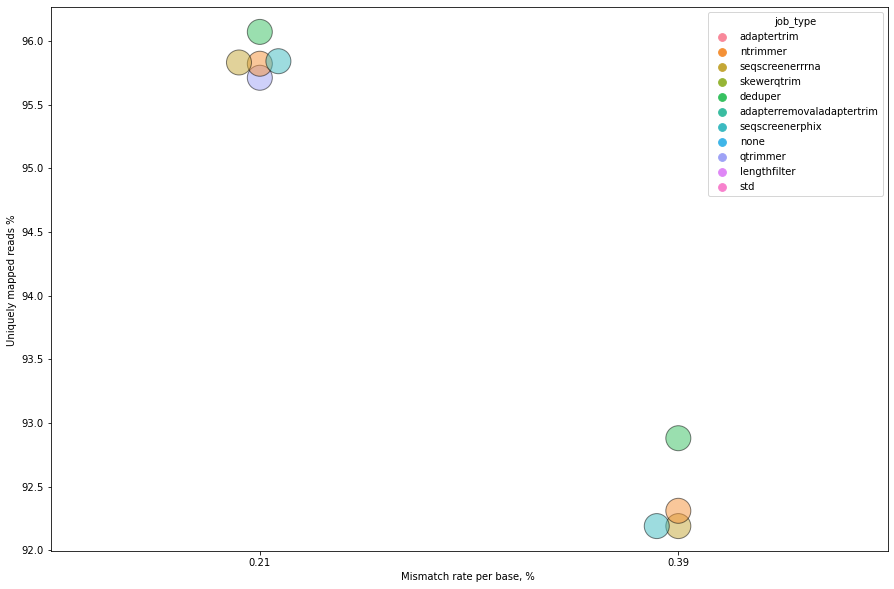

In [126]:
fig, ax = plt.subplots(figsize=(19,4.8))
sns.swarmplot(data=df, x="Mismatch rate per base, % ", y="Uniquely mapped reads % ", 
                   edgecolor="black",alpha=.5, s=25,linewidth=1.0, ax=ax, hue="job_type" )
fig.set_size_inches(15,10)

plt.show()